In [45]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as preprocessing
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [47]:
fords = pd.read_csv('ford.csv')
fords.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [49]:
fords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [51]:
fords.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [53]:
fords = pd.get_dummies(fords)
fords.head()

,year,price,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,12000,15944,150,57.7,1.0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,2018,14000,9083,150,57.7,1.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,2017,13000,12456,150,57.7,1.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,2019,17500,10460,145,40.3,1.5,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,2019,16500,1482,145,48.7,1.0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [55]:
rows = ['year', 'price', 'mileage', 'mpg']
for numerical_row in rows:
    imr_mean = SimpleImputer(strategy= 'mean')
    imr_mean = imr_mean.fit(fords[[numerical_row]])
    fords[numerical_row]= imr_mean.transform(fords[[numerical_row]]).ravel()

fords.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          17966 non-null  float64
 1   price                         17966 non-null  float64
 2   mileage                       17966 non-null  float64
 3   tax                           17966 non-null  int64  
 4   mpg                           17966 non-null  float64
 5   engineSize                    17966 non-null  float64
 6   model_ B-MAX                  17966 non-null  bool   
 7   model_ C-MAX                  17966 non-null  bool   
 8   model_ EcoSport               17966 non-null  bool   
 9   model_ Edge                   17966 non-null  bool   
 10  model_ Escort                 17966 non-null  bool   
 11  model_ Fiesta                 17966 non-null  bool   
 12  model_ Focus                  17966 non-null  bool   
 13  m

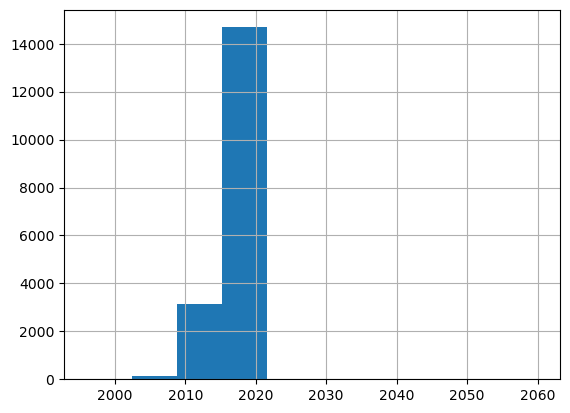

In [57]:
fords.year.hist()
plt.show()

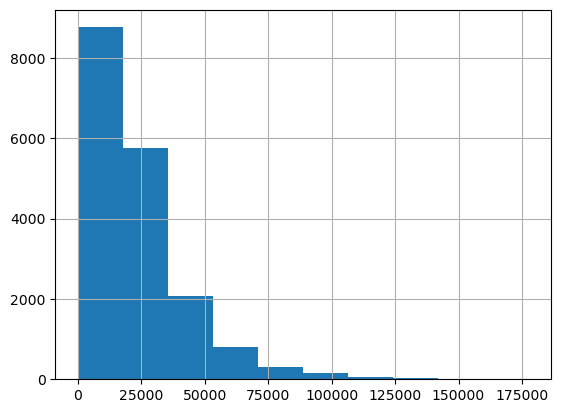

In [59]:
fords.mileage.hist()
plt.show()

In [65]:
#Standardization

fords = fords.loc[~((fords.price > 8000000)|
                    (fords.year > 2080))]

scaler = preprocessing.MinMaxScaler()
fords[['year', 'mileage', 'price', 'mpg']] = scaler.fit_transform(fords[['year', 'mileage', 'price', 'mpg']])
fords.head()

,year,price,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.328125,0.211101,0.089747,150,0.203867,1.0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,0.343750,0.247798,0.051125,150,0.203867,1.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,0.328125,0.229450,0.070113,150,0.203867,1.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,0.359375,0.312018,0.058877,145,0.107735,1.5,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,0.359375,0.293670,0.008337,145,0.154144,1.0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [67]:
#Normalization

fords[['year', 'mileage', 'price', 'mpg']] = preprocessing.normalize(fords[['year', 'mileage', 'price', 'mpg']])

fords.head()

,year,price,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.730347,0.469872,0.199761,150,0.453772,1.0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,0.726720,0.523869,0.108083,150,0.430995,1.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,0.721562,0.504570,0.154181,150,0.448314,1.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,0.731170,0.634820,0.119788,145,0.219193,1.5,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,0.734763,0.600425,0.017045,145,0.315156,1.0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True


In [71]:
#Bining

est = preprocessing.KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy= 'uniform')

est.fit(fords[['year', 'mileage', 'price', 'mpg']])
fords[['year', 'mileage', 'price', 'mpg']] = est.transform(fords[['year', 'mileage', 'price', 'mpg']])
fords.head()

,year,price,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,7.0,4.0,2.0,150,5.0,1.0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,7.0,5.0,1.0,150,5.0,1.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,7.0,5.0,1.0,150,5.0,1.0,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,7.0,6.0,1.0,145,2.0,1.5,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,7.0,6.0,0.0,145,3.0,1.0,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
